### Exercises Chapter 5 from the Introduction to Statistical Learning book 

Exercise 3 

(a)

K-fold cross validation is implemented in a way where the model looks at different groups, one at a time. 
The idea is to divide the observations of the data sets into various, random groups, of amount k, also called folds. 
Once there are k folds, we then try to use the first group as a test set and the remaining groups as the train set, on which the model is fitted. 
From this first fit, the MSE (mean squared error) is computed. 
This operation is repeted over all the k groups, which creates k MSEs. 
To have a final measure, all the MSE are averaged into one results called the Cross-Validation. 

(b) 

i.  The advantage of the k-fold cross validation relative to the validation set approach is its increased accuracy of test error rate result as it will have more training set than in the validation set approach. 
    The disadvantage relative to the validation set approach is that the k-fold cross validation requires more computation because the data set is divided into several groups, whereas the validation set approach only divides into two groups. 
    
ii. The advantages of the k-fold cross validation relative to the LOOCV is first, the fact that it requires less computational power. It is easier to fit a model a fixed number of times rather than n number of times. Second, it gives more accurate estimates. Thanks to the bias-variance trade-off, the test error rate are often more precise. 
    The disadvantage relative to the LOOCV is that it will give a better accuracy but a lower variance in the error test rate because the models are fitted across almost indentical training set which allow a lower variance. On the contrary, k-fold cross validation is fitted on training set where they are less likely to be similar which lead to a higher variance. 

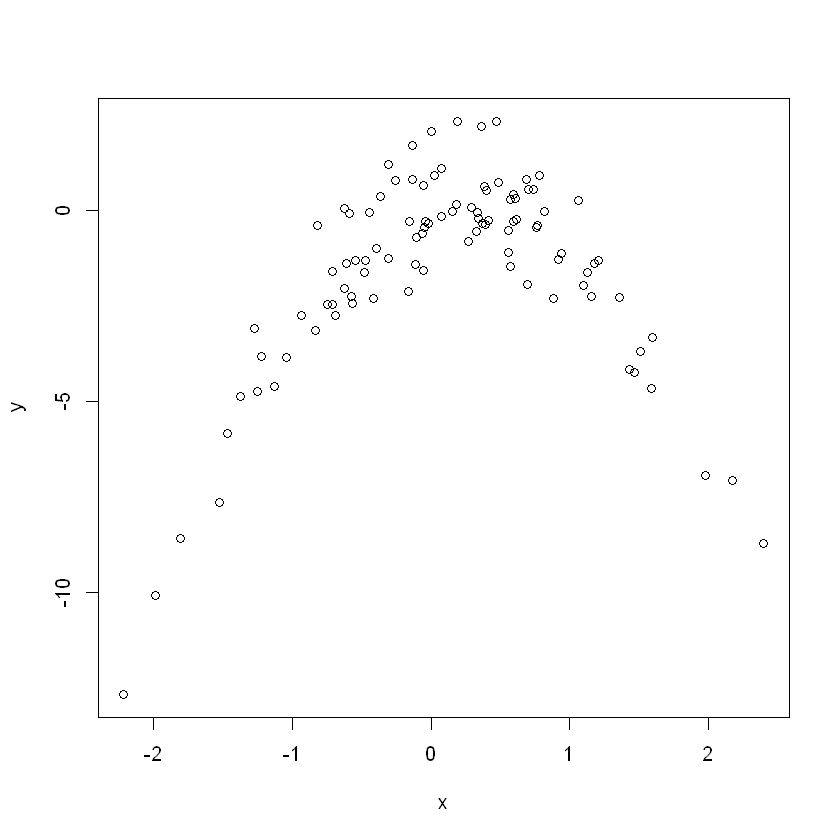

In [24]:
# Exercise 8 

#(a)

set.seed(1)
x = rnorm(100)
y = x-2*x^2+rnorm(100)
data = data.frame(x,y)

# In this data set, n=100 and p=2
# The model can be written as Y = X - 2X^2 + e, where e is the standard error 

#(b)

plot(x,y)

# We can see a bell shaped distribution from this scatter plot. 

In [25]:
#(c)
library(boot)
set.seed(1)
# i. 
glm.fit.i = glm(y~x)
cv.error.i = cv.glm(data, glm.fit.i)$delta
print(cv.error.i)

# ii. 
glm.fit.ii = glm(y~poly(x,2))
cv.error.ii = cv.glm(data, glm.fit.ii)$delta
print(cv.error.ii)

# iii. 
glm.fit.iii = glm(y~poly(x,3))
cv.error.iii = cv.glm(data, glm.fit.iii)$delta
print(cv.error.iii)

# iiii.
glm.fit.iiii = glm(y~poly(x,4))
cv.error.iiii = cv.glm(data, glm.fit.iiii)$delta
print(cv.error.iiii)

[1] 7.288162 7.284744
[1] 0.9374236 0.9371789
[1] 0.9566218 0.9562538
[1] 0.9539049 0.9534453


In [26]:
#(d)
set.seed(5)
# i. 
glm.fit.i = glm(y~x)
cv.error.i = cv.glm(data, glm.fit.i)$delta
print(cv.error.i)

# ii. 
glm.fit.ii = glm(y~poly(x,2))
cv.error.ii = cv.glm(data, glm.fit.ii)$delta
print(cv.error.ii)

# iii. 
glm.fit.iii = glm(y~poly(x,3))
cv.error.iii = cv.glm(data, glm.fit.iii)$delta
print(cv.error.iii)

# iiii.
glm.fit.iiii = glm(y~poly(x,4))
cv.error.iiii = cv.glm(data, glm.fit.iiii)$delta
print(cv.error.iiii)

# The results are the same in both cases. 

[1] 7.288162 7.284744
[1] 0.9374236 0.9371789
[1] 0.9566218 0.9562538
[1] 0.9539049 0.9534453


In [27]:
#(e)

# The model with the lowest LOOCV error seems to be the second equation. It seems logical as it is in a quadratic form which is the same as the scatter plot above. 

#(f)
summary(glm.fit.i)
summary(glm.fit.ii)
summary(glm.fit.iii)
summary(glm.fit.iiii)

# The results agree with the conlusions d'awn based on cross-validation results as we can see that with flm.fit.ii,
# the p-values of every predictor is statistically significant. 


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


### Exercises Chapter 6 from the Introduction to Statistical Learning book 

Exercise 1 

(a)
Best subset will be the model with the smallest training RSS as it takes into account all the predictors, it will also have the largest R^2

(b)
In link with the question before, it is possible that the best subset will have the smallest test RSS. However, this also depends on the model and its similarity to other models. If they are all quite similar, it might be interesting to take the model which has the lowest amount of predictors. 

(c) 
i. True 
ii. True 
iii. False
iv. False
v. False

In [52]:
# Exercise 9 

#(a)
library(ISLR)

set.seed(8)
x = model.matrix(Apps~.,College)[,-1]
y = College$Apps
grid = 10^seq(10,-2,length=100)

train = sample(1:nrow(x), nrow(x)/1.3)
test = (-train)
y_test = y[test]

train_college = data.frame(College[train,])
test_college = data.frame(College[test,])
#(b)
lm.fit = lm(Apps~., data=train_college)
lm.pred = predict(lm.fit, test_college)
mean((lm.pred-test_college$Apps)^2)

[1] 1867144

In [38]:
#(c)
library(glmnet)
cv = cv.glmnet(x[train,],y[train],alpha=0)
lambda = cv$lambda.min

ridge_reg = glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge_pred = predict(ridge_reg, s=lambda, newx=x[test,])
mean((ridge_pred-y_test)^2)

[1] 3518664

In [40]:
#(d)
cv = cv.glmnet(x[train,],y[train],alpha=1)
lambda = cv$lambda.min


lasso_mod = glmnet(x[train,],y[train],alpha=1,lambda=grid)
lasso_pred = predict(lasso_mod, s=lambda, newx=x[test,])
mean((lasso_pred-y_test)^2)

coef = predict(lasso_mod, type="coefficients", s=lambda)[1:18,]
length(coef[coef!= 0])
coef

[1] 2064128

[1] 13

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-504.23113360 -623.64856176    1.24612437    0.00000000   26.56049568 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
  -0.30182184    0.03077568    0.00000000   -0.03022135    0.12893627 
        Books      Personal           PhD      Terminal     S.F.Ratio 
   0.00000000    0.00000000   -2.76112631   -6.25715799    0.00000000 
  perc.alumni        Expend     Grad.Rate 
  -2.16627919    0.08176097    4.64527744

Warning message:
"package 'pls' is in use and will not be installed"


[1] 5341194

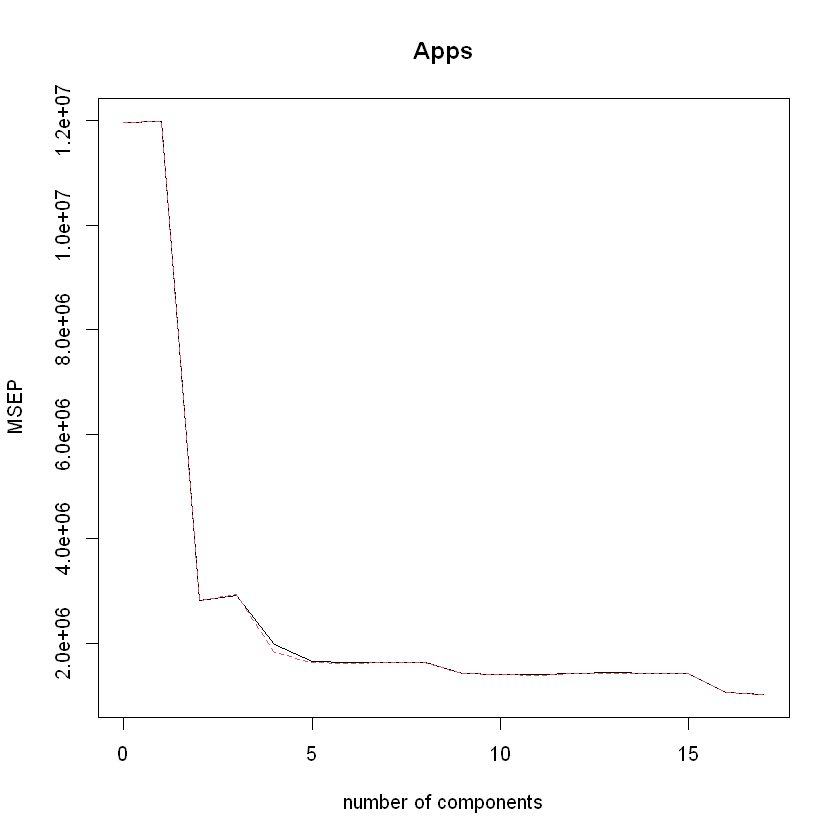

In [45]:
#(e)
install.packages("pls")
library(pls)
pcr_mod = pcr(Apps~., data=College, subset=train, scale=T, validation="CV")

validationplot(pcr_mod, val.type="MSEP")

pcr_pred = predict(pcr_mod, x[test,], ncomp=5)
mean((pcr_pred-y_test)^2)

[1] 1916198

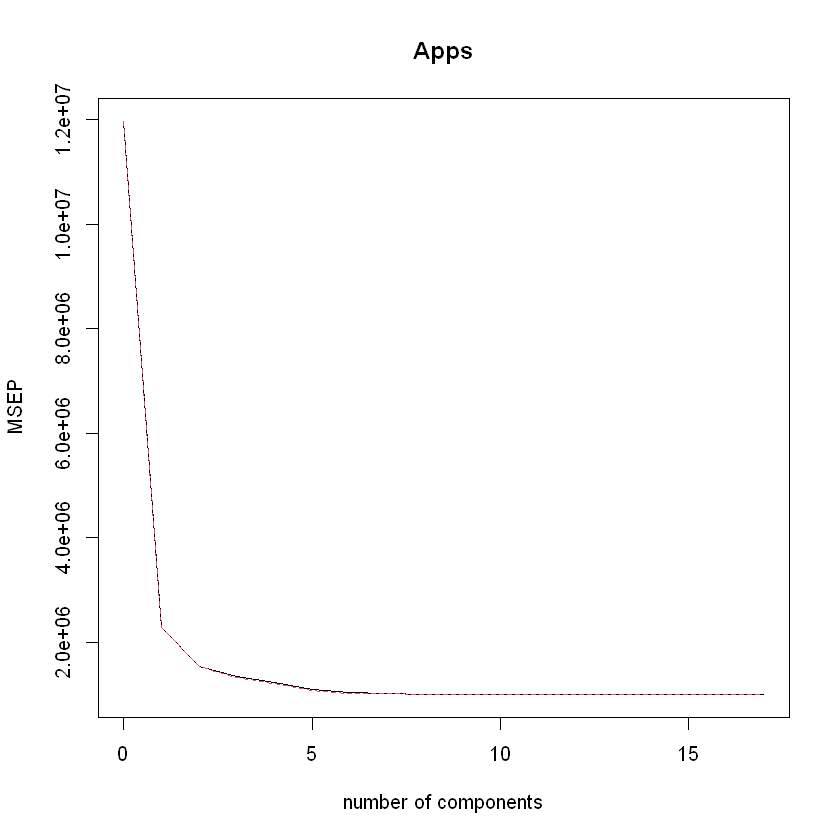

In [46]:
#(f)
pls_mod = plsr(Apps~., data=College, subset=train, scale=T, validation="CV")

validationplot(pls_mod, val.type="MSEP")

pls_pred = predict(pls_mod, x[test,], ncomp=8)
mean((pls_pred-y_test)^2)

### Exercises Chapter 7 from the Introduction to Statistical Learning book

Warning message:
"package 'leaps' is in use and will not be installed"


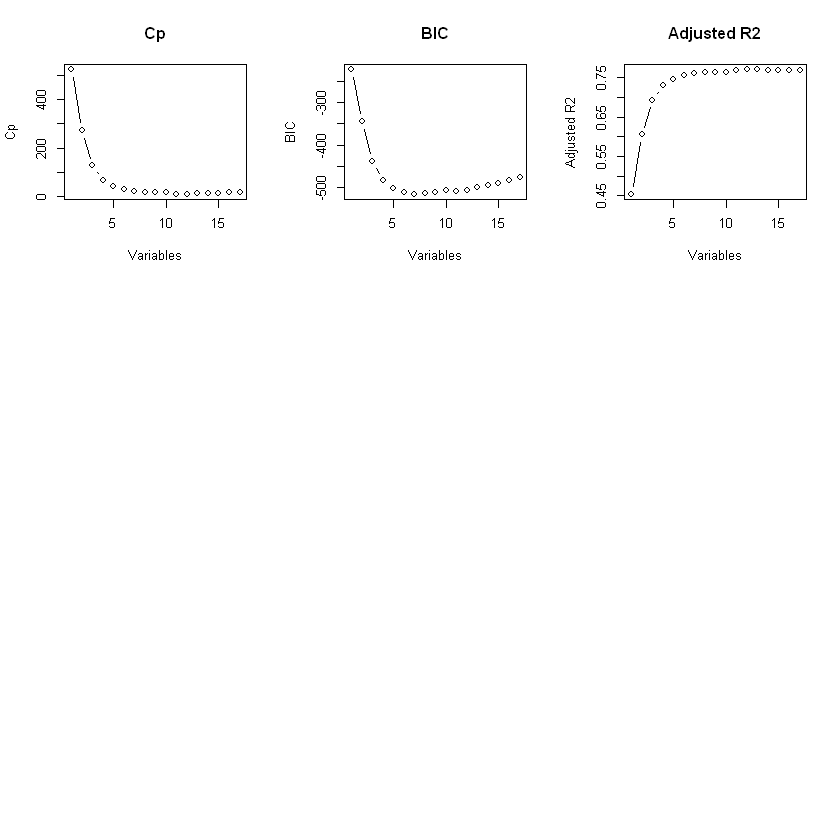

In [68]:
# Exercise 10
library(ISLR)
install.packages("leaps")
library(leaps)
library(gam)

#(a)
train = sample(length(College$Outstate), length(College$Outstate)/2)
test = -train
train_college = College[train, ]
test_college = College[test, ]

reg_fit = regsubsets(Outstate ~ ., data = train_college, nvmax = 17, method = "forward")
reg_summary = summary(reg_fit)

par(mfrow=c(3,3))
plot(1:17, reg_summary$cp,xlab="Variables",ylab="Cp",main="Cp", type='b')
plot(1:17, reg_summary$bic,xlab="Variables",ylab="BIC",main="BIC", type='b')
plot(1:17, reg_summary$adjr2,xlab="Variables",ylab="Adjusted R2",main="Adjusted R2", type='b')

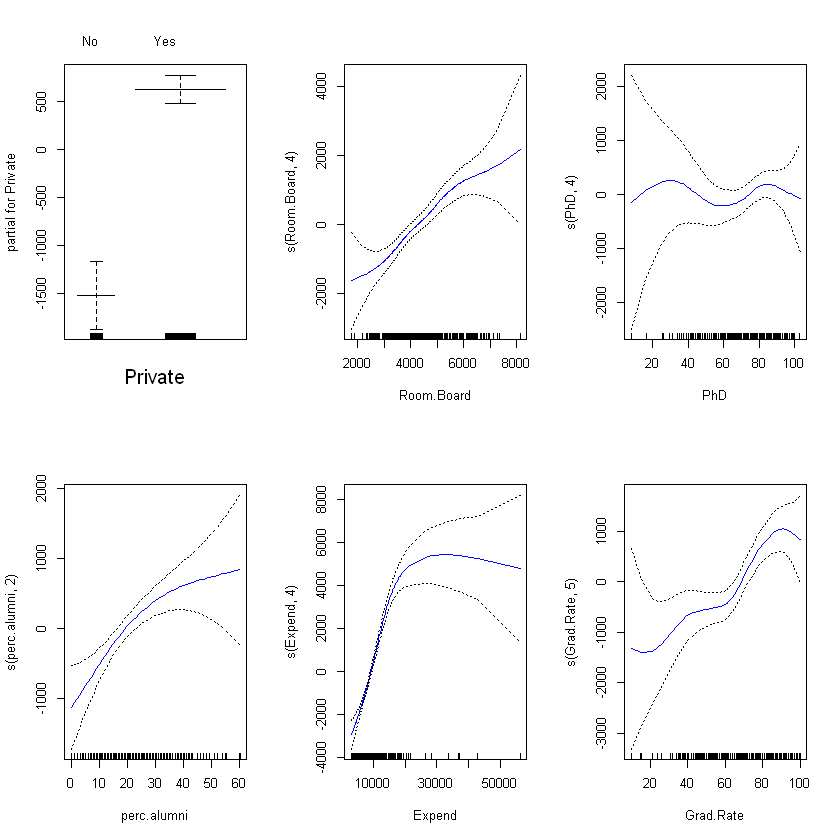

In [69]:
#(b)
gam = gam(Outstate~Private+
               s(Room.Board,4)+
               s(PhD,4)+
               s(perc.alumni,2)+
               s(Expend,4)+
               s(Grad.Rate,5), data=train_college)
par(mfrow=c(2,3))
plot(gam, col="blue", se=T)

In [70]:
#(c)
gam_pred = predict(gam, test_college)
mean((test_college$Outstate - gam_pred)^2)

[1] 3953156

In [71]:
summary(gam)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 4) + s(PhD, 
    4) + s(perc.alumni, 2) + s(Expend, 4) + s(Grad.Rate, 5), 
    data = train_college)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-4453.26 -1166.54   -35.55  1196.29  6827.86 

(Dispersion Parameter for gaussian family taken to be 3061569)

    Null Deviance: 6212963858 on 387 degrees of freedom
Residual Deviance: 1123596147 on 367.0001 degrees of freedom
AIC: 6918.068 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 1689081175 1689081175 551.705 < 2.2e-16 ***
s(Room.Board, 4)    1 1175121229 1175121229 383.830 < 2.2e-16 ***
s(PhD, 4)           1  252466084  252466084  82.463 < 2.2e-16 ***
s(perc.alumni, 2)   1  273484493  273484493  89.328 < 2.2e-16 ***
s(Expend, 4)        1  646630494  646630494 211.209 < 2.2e-16 ***
s(Grad.Rate, 5)     1   92196357   92196357  30.114 7.609e-08 ***
R